In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [ ]:
# At first we're going to load our dataset
# then we shall check our data
# we shall train the model
# we shall evaluate the model
# we shall make predictions

In [104]:
# loading the dataset

dataset = pd.read_csv("C:/kaggle datasets/HousePrice1.csv")
dataset.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [105]:
# let us check the shape of the dataset
# checking the number of rows and columns in the dataframe

dataset.shape

(13320, 9)

In [106]:
# check for missing values

dataset.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [107]:
# removing the missing values

dataset1 = dataset.dropna()
print(dataset1)

                  area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
5      Super built-up  Area  Ready To Move                Whitefield   
11               Plot  Area  Ready To Move                Whitefield   
...                     ...            ...                       ...   
13313  Super built-up  Area  Ready To Move               Uttarahalli   
13314  Super built-up  Area  Ready To Move         Green Glen Layout   
13315        Built-up  Area  Ready To Move                Whitefield   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Be

In [108]:
dataset1.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [109]:
# statistical measures of the dataset

dataset1.describe()

,bath,balcony,price
count,7496.000000,7496.000000,7496.000000
mean,2.458378,1.629936,96.857122
std,0.881128,0.780127,105.382490
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.500000
50%,2.000000,2.000000,69.755000
75%,3.000000,2.000000,105.000000
max,9.000000,3.000000,2700.000000


In [110]:
dataset1 = dataset1.drop(['area_type', 'availability', 'location', 'size', 'society'], axis=1)

In [111]:
dataset1 = dataset1.drop(['total_sqft'], axis=1)

In [112]:
dataset1.head(3)

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
3,3.0,1.0,95.00


In [113]:
X = dataset1.drop(['price'], axis=1)
y = dataset1['price']

In [114]:
print(X, y)

       bath  balcony
0       2.0      1.0
1       5.0      3.0
3       3.0      1.0
5       2.0      1.0
11      5.0      3.0
...     ...      ...
13313   2.0      1.0
13314   3.0      3.0
13315   4.0      0.0
13317   2.0      1.0
13318   4.0      1.0

[7496 rows x 2 columns] 0         39.07
1        120.00
3         95.00
5         38.00
11       295.00
          ...  
13313     57.00
13314    112.00
13315    231.00
13317     60.00
13318    488.00
Name: price, Length: 7496, dtype: float64


In [115]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

In [116]:
print(X.shape, Xtrain.shape, Xtest.shape)

(7496, 2) (5996, 2) (1500, 2)


In [117]:
print(y.shape, ytrain.shape, ytest.shape)

(7496,) (5996,) (1500,)


In [118]:
# model training

model = XGBRegressor()
model.fit(Xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [119]:
# prediction on training data

trainingDataPrediction = model.predict(Xtrain)
print(trainingDataPrediction)

[60.805573 60.805573 33.50495  ... 60.805573 62.855553 69.6451  ]


In [120]:
# r squarred error

score1 = metrics.r2_score(ytrain, trainingDataPrediction)

# mean absolute
score2 = metrics.mean_absolute_error(ytrain, trainingDataPrediction)

print('R Squarred Error:', score1)
print('Mean Absolute Error:', score2)

R Squarred Error: 0.4135208115236868
Mean Absolute Error: 35.83880499230933


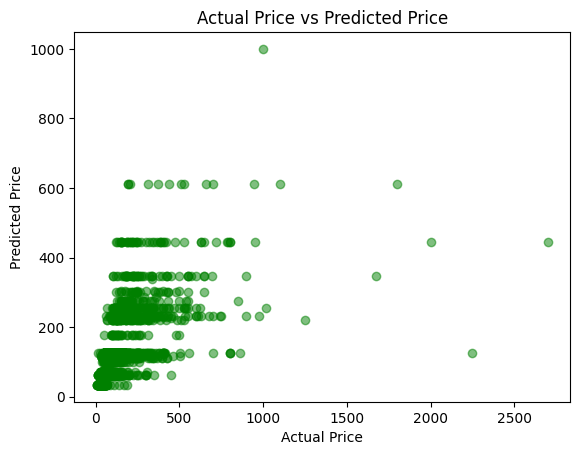

In [121]:
# visualize the actual prices and predicted prices

plt.scatter(ytrain, trainingDataPrediction, color='green', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [122]:
# accuracy for prediction on test data
test_data_prediction = model.predict(Xtest)

In [123]:

# R Squared Error
score_1 = metrics.r2_score(ytest, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(ytest, test_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.3763594295548667
Mean Absolute Error: 38.05731969268799


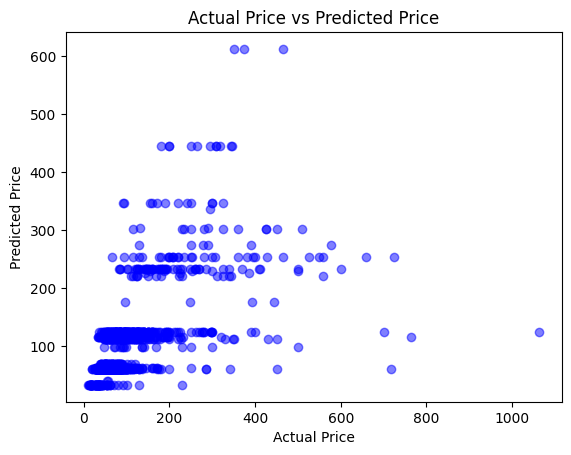

In [124]:
plt.scatter(ytest, test_data_prediction, color='blue', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()